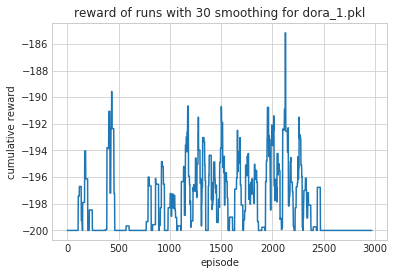

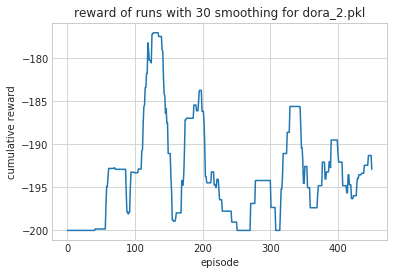

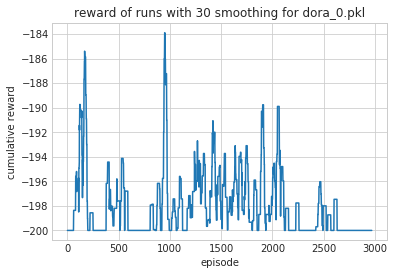

In [28]:
import os
import numpy as np
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

sns.set_style("whitegrid")

logdir = 'logs'
mode = 'dora'
smooth = 30

for fn in os.listdir(logdir):
    if not fn.startswith(mode):
        continue
    rewards = joblib.load(os.path.join(logdir, fn))
    rewards = running_mean(rewards, smooth)
    plt.plot(rewards)
    plt.title('reward of runs with {} smoothing for {}'.format(smooth, fn))
    plt.xlabel('episode')
    plt.ylabel('cumulative reward')
    plt.show()
        

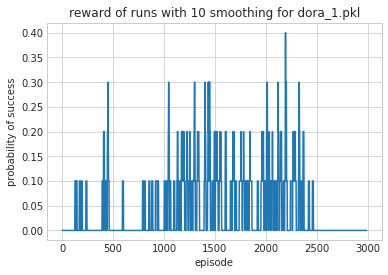

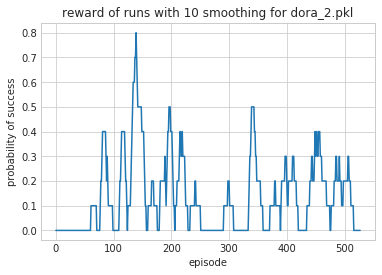

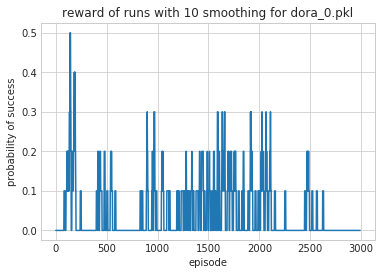

In [33]:
import os
import numpy as np
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt

def running_prob(x, N):
    prob = (np.array(x) > -200)
    cumsum = np.cumsum(np.insert(prob, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

sns.set_style("whitegrid")

logdir = 'logs'
mode = 'dora'
smooth = 10

for fn in os.listdir(logdir):
    if not fn.startswith(mode):
        continue
    rewards = joblib.load(os.path.join(logdir, fn))
    # convert to probability
    rewards = running_prob(rewards, smooth)
    plt.plot(rewards)
    plt.title('reward of runs with {} smoothing for {}'.format(smooth, fn))
    plt.xlabel('episode')
    plt.ylabel('probability of success')
    plt.show()